In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
# For Chinese font
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="NotoSansCJKtc-Regular.otf", size=10)

[ 773 1256 1613]


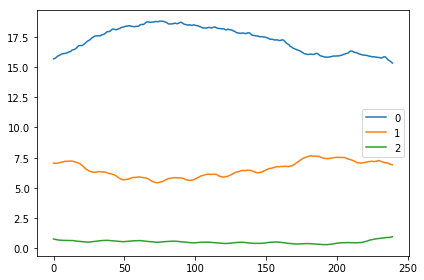

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import linear_model
ncluster = 3
data11 = pd.read_csv('apts_68station.csv')
hc = AgglomerativeClustering(n_clusters=ncluster, affinity='euclidean', linkage='ward')  
hc.fit_predict(data11.T) 

print(np.bincount(hc.labels_))
#print(hc.labels_)

for i in range(ncluster):
    plt.plot(data11.iloc[:,hc.labels_==i].mean(axis=1),label=i)
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
Y = (hc.labels_==0)*1
Y = np.array(Y).reshape(len(Y),1)
print(Y.shape)

(3642, 1)


In [4]:
allrh700 = pd.read_csv('lts_local.csv')
print(allrh700.shape)
allrh700.head()
from sklearn.decomposition import PCA
forpca= allrh700.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
proj = pca.transform(forpca)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA
#print(np.cumsum(pca.explained_variance_ratio_))
#plt.bar(range(20),pca.explained_variance_ratio_)
#plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r-')
#plt.show()

(3651, 673)
(3651, 672)


In [5]:
allrh700 = pd.read_csv('pv_local.csv')
print(allrh700.shape)
allrh700.head()
from sklearn.decomposition import PCA
forpca= allrh700.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projpv = pca.transform(forpca)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA
#print(np.cumsum(pca.explained_variance_ratio_))
#plt.bar(range(20),pca.explained_variance_ratio_)
#plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r-')
#plt.show()

(3651, 673)
(3651, 672)


In [6]:
allrh850 = pd.read_csv('tw_h500.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projh500 = pca.transform(forpca)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA
#print(np.cumsum(pca.explained_variance_ratio_))

(3642, 6720)


In [7]:
allrh850 = pd.read_csv('th925_local.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projth925 = pca.transform(forpca)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA
#print(np.cumsum(pca.explained_variance_ratio_))

(3651, 672)


In [8]:
allrh850 = pd.read_csv('div925_local.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projdiv925 = pca.transform(forpca)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA
#print(np.cumsum(pca.explained_variance_ratio_))

(3651, 672)


In [23]:
allrh850 = pd.read_csv('div700_local.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projdiv700 = pca.transform(forpca)       

(3651, 672)


In [24]:
allrh850 = pd.read_csv('th700_local.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projth700 = pca.transform(forpca)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA

(3651, 672)


In [33]:
nor_lts = preprocessing.scale(proj,axis=0)
nor_pv = preprocessing.scale(projpv,axis=0)
nor_h500 = preprocessing.scale(projh500,axis=0)
nor_th925 = preprocessing.scale(projth925,axis=0)
nor_div925 = preprocessing.scale(projdiv925,axis=0)
nor_th700 = preprocessing.scale(projth700,axis=0)
nor_div700 = preprocessing.scale(projdiv700,axis=0)

In [34]:
nor_lts.shape

(3651, 200)

In [55]:
akk=np.empty((3642,140))

akk[:,0:20] = nor_lts[0:3642,0:20]
akk[:,20:40] = nor_pv[0:3642,0:20]
akk[:,40:60] = nor_th925[0:3642,0:20]
akk[:,60:80] = nor_div925[0:3642,0:20]
akk[:,80:100] = nor_h500[0:3642,0:20]
akk[:,100:120] = nor_th700[0:3642,0:20]
akk[:,120:140] = nor_div700[0:3642,0:20]

In [56]:
y=Y
x=akk

In [48]:

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf = KFold(n_splits=5)
for train_indices, test_indices in kf.split(y):
    print('Train: %s | test: %s | Y=1: %s' % (len(train_indices), len(test_indices), float(y[test_indices,:].mean())))



Train: 2913 | test: 729 | Y=1: 0.35939643347050754
Train: 2913 | test: 729 | Y=1: 0.30315500685871055
Train: 2914 | test: 728 | Y=1: 0.23901098901098902
Train: 2914 | test: 728 | Y=1: 0.0989010989010989
Train: 2914 | test: 728 | Y=1: 0.06043956043956044


In [49]:

skf = StratifiedKFold(n_splits=5)
for train_indices, test_indices in skf.split(X=x,y=np.array(y).flatten()):
    print('Train: %s | test: %s | Y=1: %s' % (len(train_indices), len(test_indices), float(y[test_indices,:].mean())))



Train: 2913 | test: 729 | Y=1: 0.21262002743484226
Train: 2913 | test: 729 | Y=1: 0.21262002743484226
Train: 2913 | test: 729 | Y=1: 0.21262002743484226
Train: 2914 | test: 728 | Y=1: 0.21153846153846154
Train: 2915 | test: 727 | Y=1: 0.21182943603851445


In [50]:
from sklearn import linear_model, metrics
# Initialize the GLM
glm = linear_model.LogisticRegression(C=1e5, solver='lbfgs', max_iter=500)
# Fit and see in-sample error
glm.fit(x, np.array(y).flatten())
print('In-sample accuracy:')
print(glm.score(x, np.array(y).flatten()))

scores_kf = cross_val_score(glm, x, np.array(y).flatten(), cv=kf)
scores_skf = cross_val_score(glm, x, np.array(y).flatten(), cv=skf)
print('CV accuracy:')
print('  5-fold CV:')
print({'acc':scores_kf, 'mean':scores_kf.mean(), 'std':scores_kf.std()})
print('  Stratified 5-fold CV:')
print({'acc':scores_skf, 'mean':scores_skf.mean(), 'std':scores_skf.std()})

In-sample accuracy:
0.858045030203185
CV accuracy:
  5-fold CV:
{'acc': array([0.72565158, 0.7654321 , 0.77472527, 0.88324176, 0.87637363]), 'mean': 0.8050848671219042, 'std': 0.06323651036166487}
  Stratified 5-fold CV:
{'acc': array([0.77777778, 0.76268861, 0.81893004, 0.82692308, 0.80330124]), 'mean': 0.7979241496715642, 'std': 0.024324956623197513}


In [40]:
from sklearn import  datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp

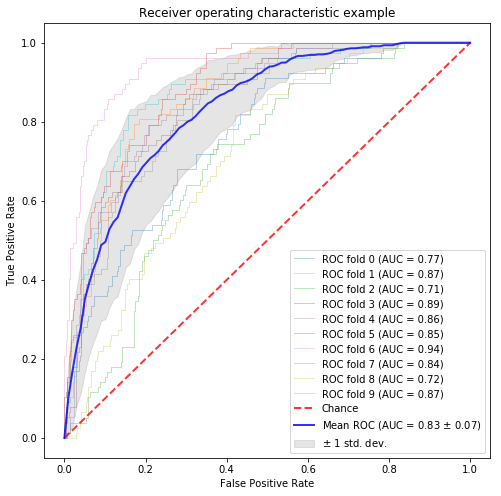

In [57]:
X = np.array(x)
Y = np.array(y).flatten()
n_samples, n_features = X.shape
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
# Initialize CV and model
cv = StratifiedKFold(n_splits=10)
classifier = linear_model.LogisticRegression(C=1e5, solver='lbfgs', max_iter=500)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Loop through CV
plt.figure(figsize=(8, 8))
i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train,:], Y[train]).predict_proba(X[test,:])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
# Make reference plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()